In [1]:
import pandas as pd
import numpy as np
import geopandas
import mapclassify

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Loading in of the data

In [2]:
results = pd.read_csv('./results/disaster_results.csv') 

In [3]:
results[results['Event Name'] == 'Camp Fire']
results = results[results['Dis No'] != '2018-0025-NLD'].copy()

In [4]:
#creating total mentions and removing the outliers that are most likely mislabeled
results = results[(results['Event Name'] != 'Camp Fire') & (results['Event Name'] !='Thomas') & (results['Event Name'] !="'Friederike' (David)")].copy()
results["Total"] = results['mentions_1'] + results['mentions_2'] + results['mentions_3']

# Make the plot comparing mentions by disaster type

/var/folders/kj/7s8hgv2j39z4bzr72h04mmlw0000gn/T/ipykernel_76639/1703616175.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comparison = results.groupby('Disaster Type')['mentions_1', 'mentions_2', 'mentions_3'].mean()


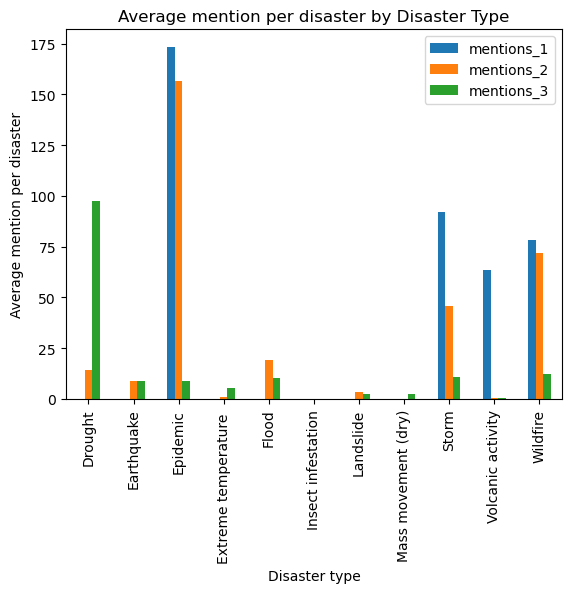

In [5]:
# just raw mentions
comparison = results.groupby('Disaster Type')['mentions_1', 'mentions_2', 'mentions_3'].mean()
labels = comparison.index
ax = comparison.plot(kind = 'bar',
                     title= 'Average mention per disaster by Disaster Type'
                    )

ax.set_xlabel('Disaster type')
ax.set_ylabel('Average mention per disaster')
ax.figure.savefig("./figures/barchart_type.png", bbox_inches="tight");

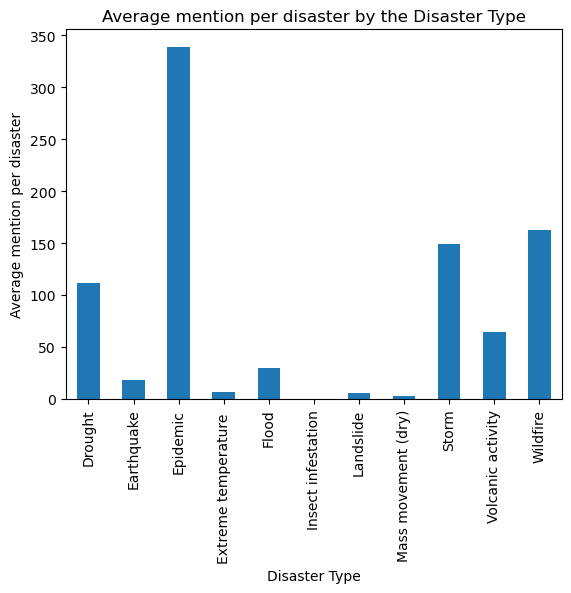

In [6]:
# combined total mentions
comparison = results.groupby('Disaster Type')['Total'].mean()
labels = comparison.index
ax = comparison.plot(kind = 'bar',
                     title= 'Average mention per disaster by the Disaster Type'
                    )
ax.set_xlabel('Disaster Type')
ax.set_ylabel('Average mention per disaster')
ax.figure.savefig("./figures/barchart_Disaster_Type_combined.png", bbox_inches="tight");

In [7]:
# Create a Daily total column
# Convert 'End Date' and 'Start Date' columns to datetime objects
results['End Date'] = pd.to_datetime(results['End Date'])
results['Start Date'] = pd.to_datetime(results['Start Date'])

# Calculate the difference in days
results['Date Difference (Days)'] = (results['End Date'] - results['Start Date']).dt.days

# Calculate the relative total with condition
results['Relative Total'] = results['Total'] / (results['Date Difference (Days)']+7)

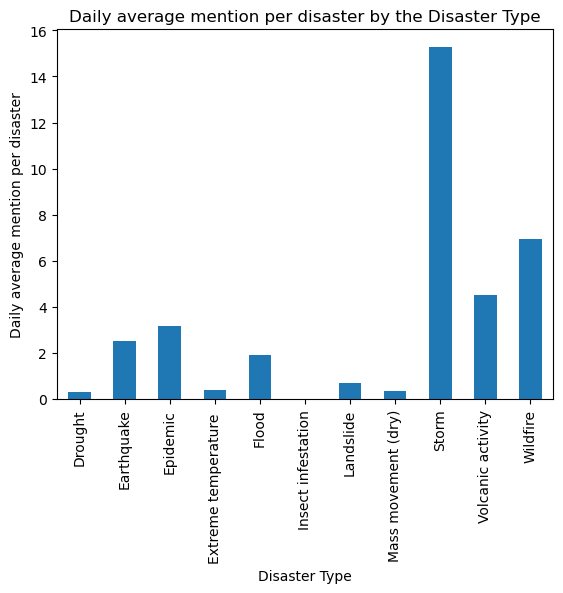

In [8]:
# show the daily total by disaster type
comparison = results.groupby('Disaster Type')['Relative Total'].mean()
labels = comparison.index
ax = comparison.plot(kind = 'bar',
                     title= 'Daily average mention per disaster by the Disaster Type'
                    )
ax.set_xlabel('Disaster Type')
ax.set_ylabel('Daily average mention per disaster')
ax.figure.savefig("./figures/barchart_Disaster_Type_Daily.png", bbox_inches="tight");

In [9]:
# show the top 10 of most mentioned disasters
results.sort_values(['Total'], ascending=False).head(10)

,Unnamed: 0,Dis No,Year,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Appeal,Declaration,AID Contribution ('000 US$),Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damages, Adjusted ('000 US$)","Total Damages, Adjusted ('000 US$)",Geo Locations,Start Date,End Date,Location List,mentions_1,mentions_2,mentions_3,Total,Date Difference (Days),Relative Total
215,215,2017-0410-CRI,2017,TC-2017-000148,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical depression'16/Hurricane 'Nate',Costa Rica,CRI,Central America,Americas,"South Pacific, Region 8- South Zone – Central ...",NaN,Flood,"Slide (land, mud, snow, rock)",NaN,Yes,NaN,NaN,Kph,NaN,NaN,"Tempisque, Bebedero, and Sierpe Rivers in Cats...",13.0,NaN,11500.0,NaN,11500.0,NaN,NaN,220876.0,"Alajuela, Cartago, Guanacaste, Puntarenas, San...",2017-09-04,2017-10-06,"['South Pacific', 'Region 8- South Zone – Cent...",2069,3302,0,5371,32.0,137.717949
1079,1079,2018-0438-TCD,2018,NaN,Natural,Biological,Epidemic,Viral disease,NaN,Measles,Chad,TCD,Middle Africa,Africa,"Abdi, Abeche, Abougudam,Adre, Am dam, Am Timan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccinated,NaN,NaN,NaN,90.0,4227.0,NaN,NaN,4227.0,NaN,NaN,NaN,NaN,2018-05-30,2019-04-12,"['Abdi', 'Abeche', 'Abougudam,Adre', 'Am dam',...",713,3140,0,3853,317.0,11.891975
990,990,2017-0381-USA,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',United States of America (the),USA,Northern America,Americas,"Keys islands, Monroe, South Florida, Jacksonvi...",NaN,Flood,NaN,NaN,NaN,NaN,300.0,Kph,NaN,NaN,NaN,97.0,NaN,NaN,70000.0,70000.0,NaN,34623866.0,68053807.0,"Beaufort, Broward, Camden, Charleston, Chatham...",2017-09-10,2017-09-28,"['Keys islands', 'Monroe', 'South Florida', 'J...",2127,210,0,2337,18.0,93.480000
1372,1372,2019-0355-PHL,2019,PH-2019-000085,Natural,Biological,Epidemic,Viral disease,NaN,Dengue,Philippines (the),PHL,South-Eastern Asia,Asia,"II, IVA, V; Iloilo, Capiz, Aklan, Antique Guim...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccinated,NaN,NaN,NaN,492.0,106630.0,NaN,NaN,106630.0,NaN,NaN,NaN,NaN,2019-01-01,2019-06-29,"['II', 'IVA', 'V', 'Iloilo', 'Capiz', 'Aklan',...",78,2193,0,2271,179.0,12.209677
970,970,2017-0362-USA,2017,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane Harvey,United States of America (the),USA,Northern America,Americas,"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,Flood,Oil spill,NaN,Yes,NaN,215.0,Kph,NaN,NaN,"Sabine River, Brazos River, Navidad River, San...",88.0,24.0,555000.0,27000.0,582024.0,NaN,35817793.0,113423011.0,"Acadia, Allen, Angelina, Aransas, Atascosa, Au...",2017-08-25,2017-08-29,"['Eastern Texas', 'Rockport', 'Corpus Chrsti',...",1807,464,0,2271,4.0,206.454545
943,943,2016-0550-USA,2016,NaN,Natural,Meteorological,Storm,Convective storm,Lightning/Thunderstorms,NaN,United States of America (the),USA,Northern America,Americas,"Texas, Oklahoma, Kansas, Missouri, Nebraska, I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,6.0,19.0,NaN,NaN,19.0,NaN,975487.0,NaN,"Illinois, Indiana, Kansas, Kentucky, Missouri,...",2016-04-24,2017-04-28,"['Texas', 'Oklahoma', 'Kansas', 'Missouri', 'N...",0,2159,0,2159,369.0,5.742021
1018,1018,2017-0511-USA,2017,NaN,Natural,Climatological,Wildfire,NaN,NaN,'Thomas',United States of America (the),USA,Northern America,Americas,"Ventura, Santa Barbara, Los Angeles, San Diego...","Droght, winds",NaN,NaN,NaN,Yes,NaN,1102.0,Km2,NaN,NaN,NaN,2.0,2.0,NaN,2961.0,2963.0,NaN,2029675.0,2626638.0,"Los Angeles, Riverside, San Diego, Santa Barba...",2017-12-04,2017-12-31,"['Ventura', 'Santa Barbara', 'Los Angeles', 'S...",1512,240,0,1752,27.0,51.529412
608,608,2017-0381-PRI,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Puerto Rico,PRI,Caribbean

In [10]:
# show the top 10 of most daily mentioned disasters
results.sort_values(['Relative Total'], ascending=False).head(10)

,Unnamed: 0,Dis No,Year,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Appeal,Declaration,AID Contribution ('000 US$),Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damages, Adjusted ('000 US$)","Total Damages, Adjusted ('000 US$)",Geo Locations,Start Date,End Date,Location List,mentions_1,mentions_2,mentions_3,Total,Date Difference (Days),Relative Total
251,251,2017-0381-DOM,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Dominican Republic (the),DOM,Caribbean,Americas,"Veron, Higuey (La Altagracia), Samaná (Galera)...",NaN,Flood,NaN,NaN,NaN,NaN,285.0,Kph,NaN,NaN,NaN,NaN,NaN,6300.0,NaN,6300.0,NaN,NaN,NaN,"Azua, Dajabon, Espaillat, La Altagracia, La Ro...",2017-09-06,2017-09-06,"['Veron', 'Higuey', 'La Altagracia', 'Samaná',...",1531,6,0,1537,0.0,219.571429
654,654,2017-0381-KNA,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Saint Kitts and Nevis,KNA,Caribbean,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,NaN,500.0,NaN,500.0,NaN,2746.0,23879.0,"Christ Church Nichola Town, Saint Anne Sandy P...",2017-09-06,2017-09-06,[],1531,0,0,1531,0.0,218.714286
268,268,2017-0381-ATG,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Antigua and Barbuda,ATG,Caribbean,Americas,"Barbuda, St John and St George districts (Cros...",NaN,NaN,NaN,NaN,NaN,NaN,295.0,Kph,NaN,NaN,NaN,1.0,NaN,1800.0,NaN,1800.0,238785.0,8119.0,298482.0,"Barbuda, St. George, St. John (Adm1).",2017-09-06,2017-09-06,"['Barbuda', 'St John and St George districts',...",1531,0,0,1531,0.0,218.714286
262,262,2017-0381-AIA,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Anguilla,AIA,Caribbean,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,4.0,NaN,15000.0,NaN,15000.0,NaN,7999.0,238785.0,Name Unknown (Adm1).,2017-09-06,2017-09-06,[],1531,0,0,1531,0.0,218.714286
991,991,2017-0381-VIR,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Virgin Island (U.S.),VIR,Caribbean,Americas,"St. John, St. Thomas, most of St. Croix",NaN,Flood,NaN,NaN,Yes,NaN,NaN,Kph,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Saint Croix (County Equivalent), Saint John (C...",2017-09-07,2017-09-07,"['St. John', 'St. Thomas', 'most of St. Croix']",1494,2,0,1496,0.0,213.714286
608,608,2017-0381-PRI,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Puerto Rico,PRI,Caribbean,Americas,North. Culebra and Vieques Islands,NaN,Flood,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aguadilla, Arecibo, Bayamon, Humacao, San Juan...",2017-09-06,2017-09-07,['North. Culebra and Vieques Islands'],1692,0,0,1692,1.0,211.500000
970,970,2017-0362-USA,2017,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane Harvey,United States of America (the),USA,Northern America,Americas,"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,Flood,Oil spill,NaN,Yes,NaN,215.0,Kph,NaN,NaN,"Sabine River, Brazos River, Navidad River, San...",88.0,24.0,555000.0,27000.0,582024.0,NaN,35817793.0,113423011.0,"Acadia, Allen, Angelina, Aransas, Atascosa, Au...",2017-08-25,2017-08-29,"['Eastern Texas', 'Rockport', 'Corpus Chrsti',...",1807,464,0,2271,4.0,206.454545
599,599,2017-0381-HTI,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Haiti,HTI,Caribbean,Americas,"Caracol (Trou du Nord), Feroer, Malfety (Fort ...",NaN,Flood,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,1.0,17.0,40075.0,NaN,40092.0,NaN,193.0,NaN,"Cap Haitien, Fort Liberte, Ouanaminthe, Trou D...",2017-09-07,2017-09-08,"['Caracol', 'Trou du Nord', 'Feroer', 'Malfety...",1633,0,3,1636,1.0,204.500000
987,987,2017-0381-TCA,2017,TC-2017-0

# geografical analysis on the mentions

In [11]:
results_merge = results.groupby('ISO')['Total'].mean().reset_index()
results_merge.rename(columns={'ISO': 'CODE'}, inplace=True)

In [12]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,results_merge,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Total',ascending=False).reset_index()

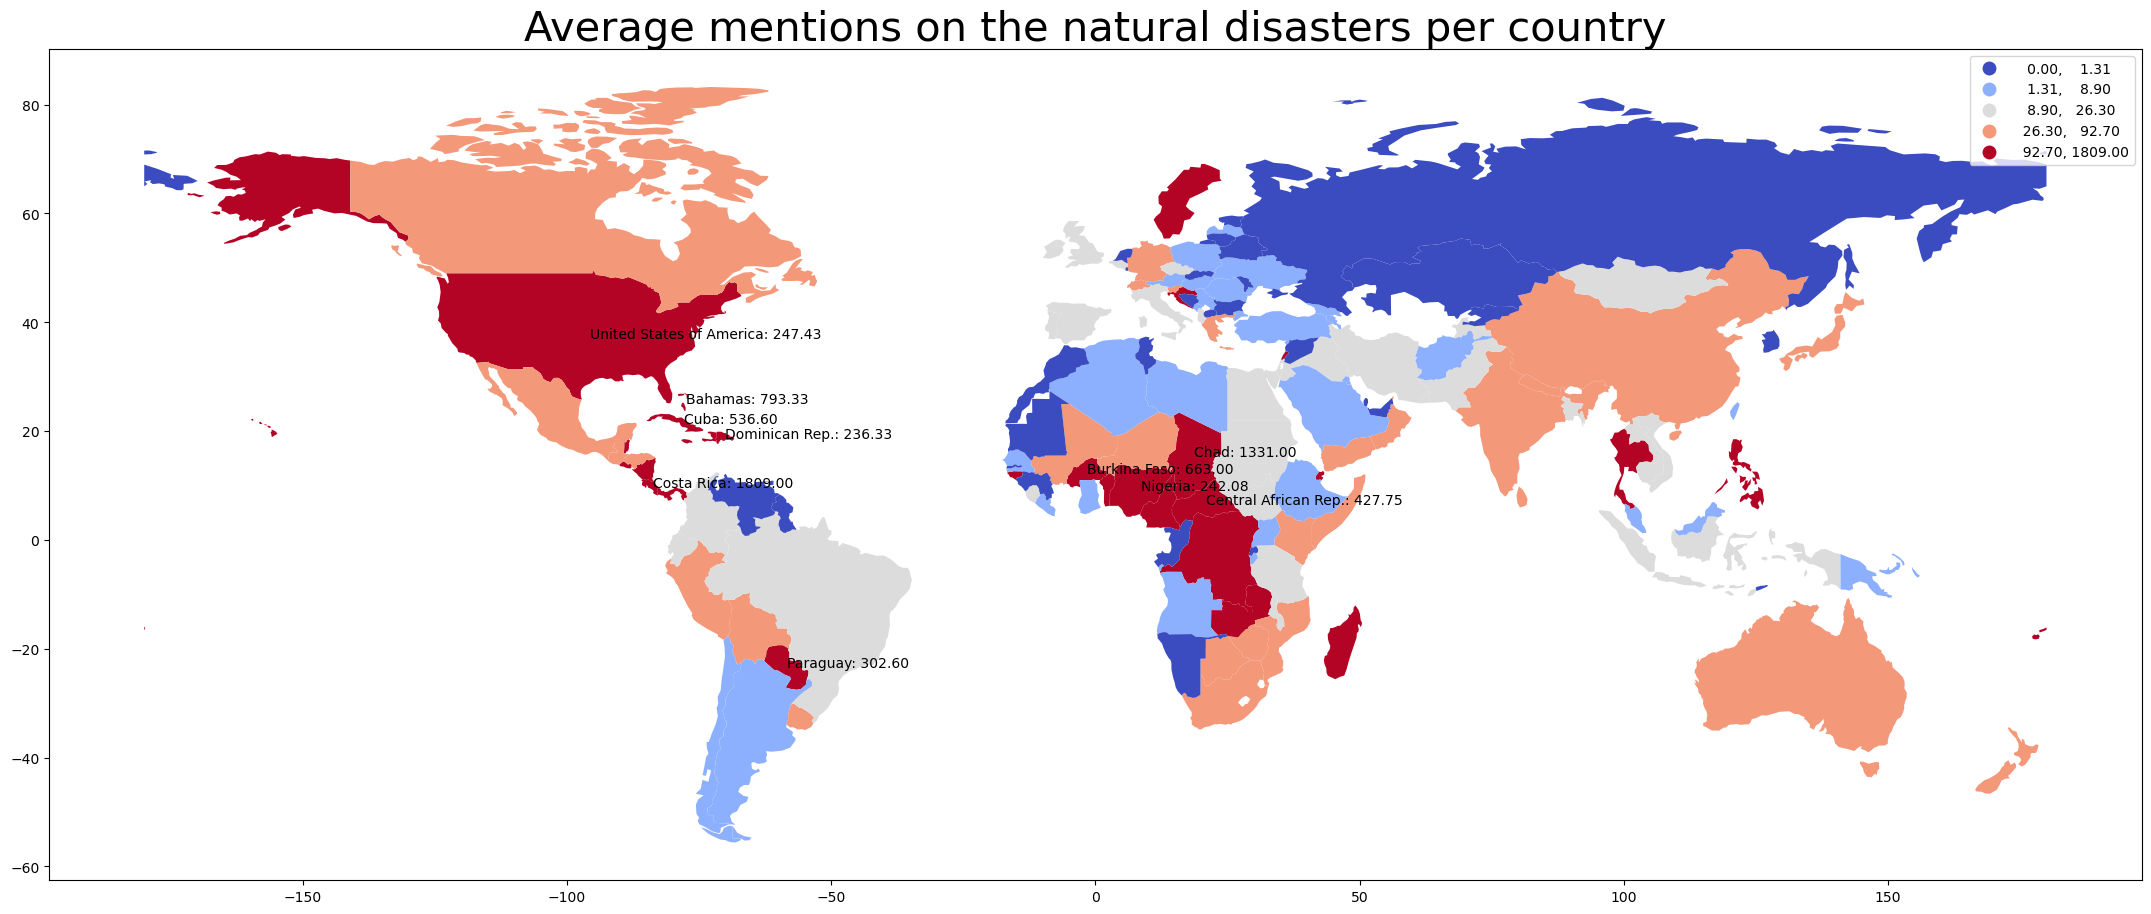

In [13]:
import matplotlib.pyplot as plt

# plot confirmed cases world map 
merge.plot(column='Total', scheme="quantiles",
           figsize=(27, 24),
           legend=True,cmap='coolwarm')
plt.title('Average mentions on the natural disasters per country',fontsize=30)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}: {:.2f}".format(merge.name[i],merge.Total[i]),size=10)

plt.savefig("./figures/world_map_Total.png", bbox_inches="tight")
plt.show()

In [14]:
# same as above on relative total
results_merge = results.groupby('ISO')['Relative Total'].mean().reset_index()
results_merge.rename(columns={'ISO': 'CODE'}, inplace=True)

In [15]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,results_merge,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Relative Total',ascending=False).reset_index()

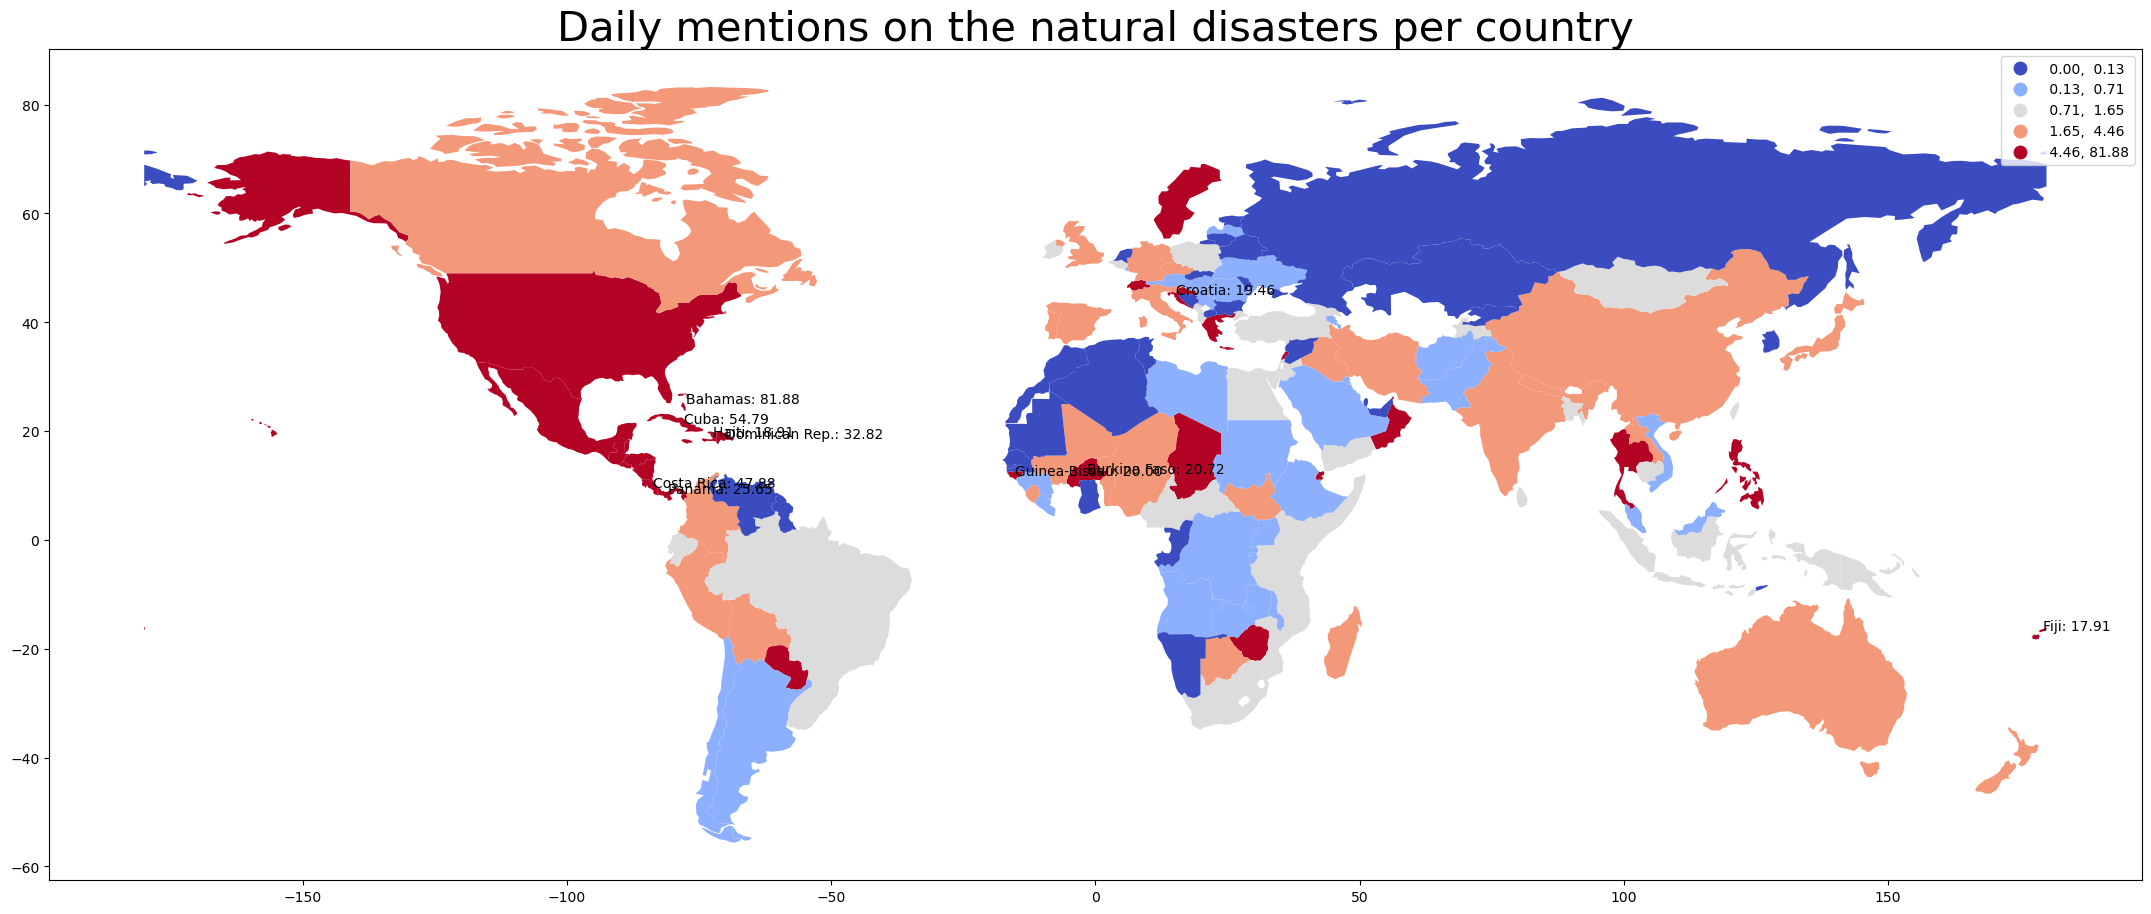

In [16]:
import matplotlib.pyplot as plt

# plot confirmed cases world map 
merge.plot(column='Relative Total', scheme="quantiles",
           figsize=(27, 24),
           legend=True,cmap='coolwarm')
plt.title('Daily mentions on the natural disasters per country',fontsize=30)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}: {:.2f}".format(merge.name[i],merge["Relative Total"][i]),size=10)

plt.savefig("./figures/world_map_relative.png", bbox_inches="tight")
plt.show()

# Looking for other facters that could influence the number of mentions

## still need to add the relative (daily) version of the following plots

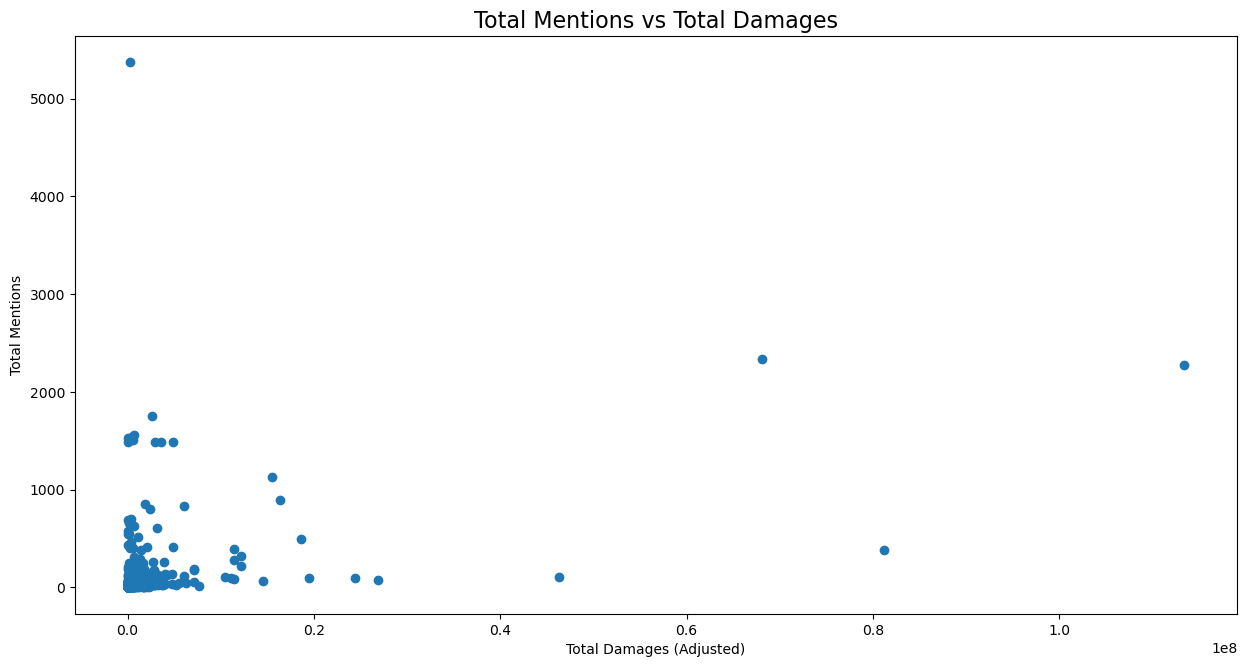

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out rows with missing values in "Total Damages, Adjusted ('000 US$)"
results_damages = results[results["Total Damages, Adjusted ('000 US$)"].notna()].copy()

# Calculate the total mentions
results_damages["Total"] = results_damages['mentions_1'] + results_damages['mentions_2'] + results_damages['mentions_3']

# Extract the filtered results
filtered_results = results_damages[["Total Damages, Adjusted ('000 US$)", "Total"]]

# Create the scatter plot
fig = plt.figure(figsize=(15, 7.5), dpi=100)
plt.scatter(filtered_results["Total Damages, Adjusted ('000 US$)"], filtered_results['Total'])
plt.xlabel("Total Damages (Adjusted)")
plt.ylabel("Total Mentions")
plt.title("Total Mentions vs Total Damages", fontsize=16)
plt.show();

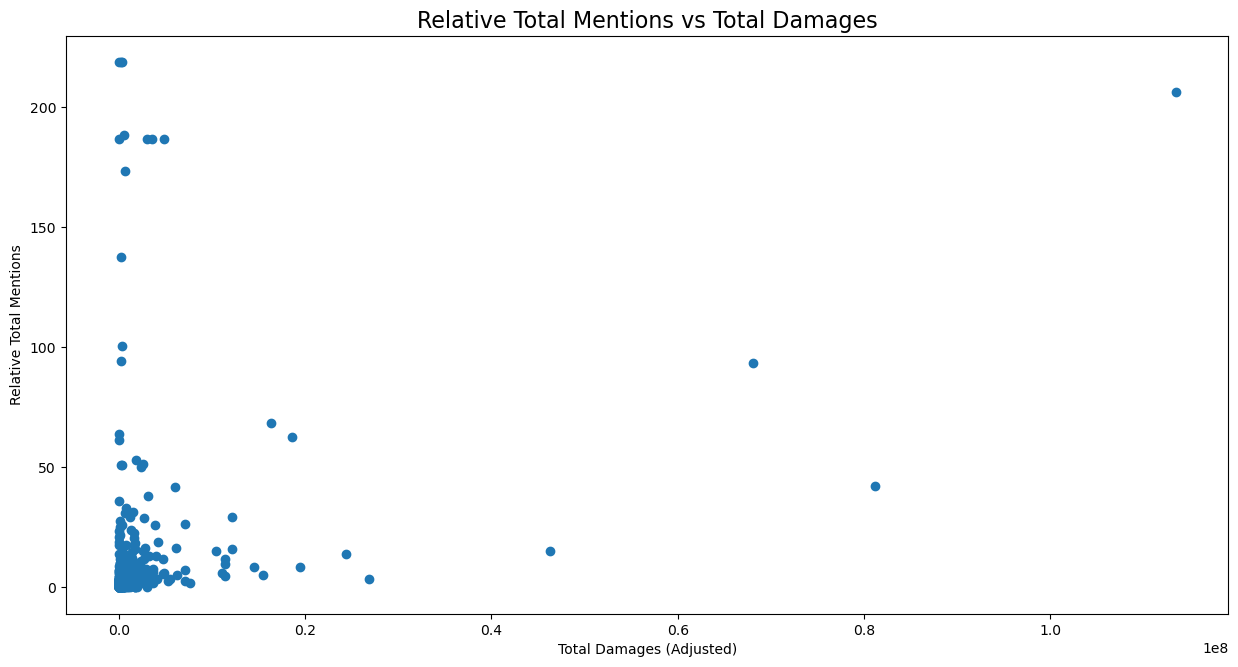

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out rows with missing values in "Total Damages, Adjusted ('000 US$)"
results_damages = results[results["Total Damages, Adjusted ('000 US$)"].notna()].copy()

# Extract the filtered results
filtered_results = results_damages[["Total Damages, Adjusted ('000 US$)", "Relative Total"]]

# Create the scatter plot
fig = plt.figure(figsize=(15, 7.5), dpi=100)
plt.scatter(filtered_results["Total Damages, Adjusted ('000 US$)"], filtered_results['Relative Total'])
plt.xlabel("Total Damages (Adjusted)")
plt.ylabel("Relative Total Mentions")
plt.title("Relative Total Mentions vs Total Damages", fontsize=16)
plt.show();

In [19]:
results
results.sort_values(["Total Damages, Adjusted ('000 US$)"], ascending=False).head(5)

,Unnamed: 0,Dis No,Year,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Appeal,Declaration,AID Contribution ('000 US$),Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damages, Adjusted ('000 US$)","Total Damages, Adjusted ('000 US$)",Geo Locations,Start Date,End Date,Location List,mentions_1,mentions_2,mentions_3,Total,Date Difference (Days),Relative Total
970,970,2017-0362-USA,2017,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane Harvey,United States of America (the),USA,Northern America,Americas,"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,Flood,Oil spill,NaN,Yes,NaN,215.0,Kph,NaN,NaN,"Sabine River, Brazos River, Navidad River, San...",88.0,24.0,555000.0,27000.0,582024.0,NaN,35817793.0,113423011.0,"Acadia, Allen, Angelina, Aransas, Atascosa, Au...",2017-08-25,2017-08-29,"['Eastern Texas', 'Rockport', 'Corpus Chrsti',...",1807,464,0,2271,4.0,206.454545
563,563,2017-0383-PRI,2017,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Maria',Puerto Rico,PRI,Caribbean,Americas,"Humacao town, San Juan, Bayamon, Guajataca (no...",NaN,Flood,Broken Dam/Burst bank,NaN,Yes,NaN,240.0,Kph,NaN,NaN,"Rio Guajataca, Rio Culebrinas, Rio Gurabo, Rio...",64.0,NaN,540000.0,210000.0,750000.0,NaN,35817793.0,81186997.0,"Aguadilla, Arecibo, Bayamon, Guayama, Humacao,...",2017-09-19,2017-09-21,"['Humacao town', 'San Juan', 'Bayamon', 'Guaja...",0,146,234,380,2.0,42.222222
990,990,2017-0381-USA,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',United States of America (the),USA,Northern America,Americas,"Keys islands, Monroe, South Florida, Jacksonvi...",NaN,Flood,NaN,NaN,NaN,NaN,300.0,Kph,NaN,NaN,NaN,97.0,NaN,NaN,70000.0,70000.0,NaN,34623866.0,68053807.0,"Beaufort, Broward, Camden, Charleston, Chatham...",2017-09-10,2017-09-28,"['Keys islands', 'Monroe', 'South Florida', 'J...",2127,210,0,2337,18.0,93.480000
104,104,2016-0107-JPN,2016,EQ-2016-000033,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Japan,JPN,Eastern Asia,Asia,Kumamoto province (Kyushu Isl.),NaN,NaN,NaN,NaN,NaN,NaN,7.0,Richter,32.788,130.70,NaN,9.0,800.0,120000.0,NaN,120800.0,NaN,NaN,46335626.0,Kumamoto (Adm1).,2016-04-14,2016-04-14,"['Kumamoto province', 'Kyushu Isl.']",0,6,101,107,0.0,15.285714
9,9,2016-0241-CHN,2016,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,China,CHN,Eastern Asia,Asia,"Jiangsu, Anhui, Jiangxi, Henan, Hubei, Hunan, ...",Heavy rains,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,720844.0,Km2,27.976,114.24,Yangtze river,289.0,NaN,60000000.0,NaN,60000000.0,NaN,526763.0,26825889.0,"Anhui Sheng, Chongqing Shi, Guangxi Zhuangzu Z...",2016-06-28,2016-07-13,"['Jiangsu', 'Anhui', 'Jiangxi', 'Henan', 'Hube...",0,5,72,77,15.0,3.500000


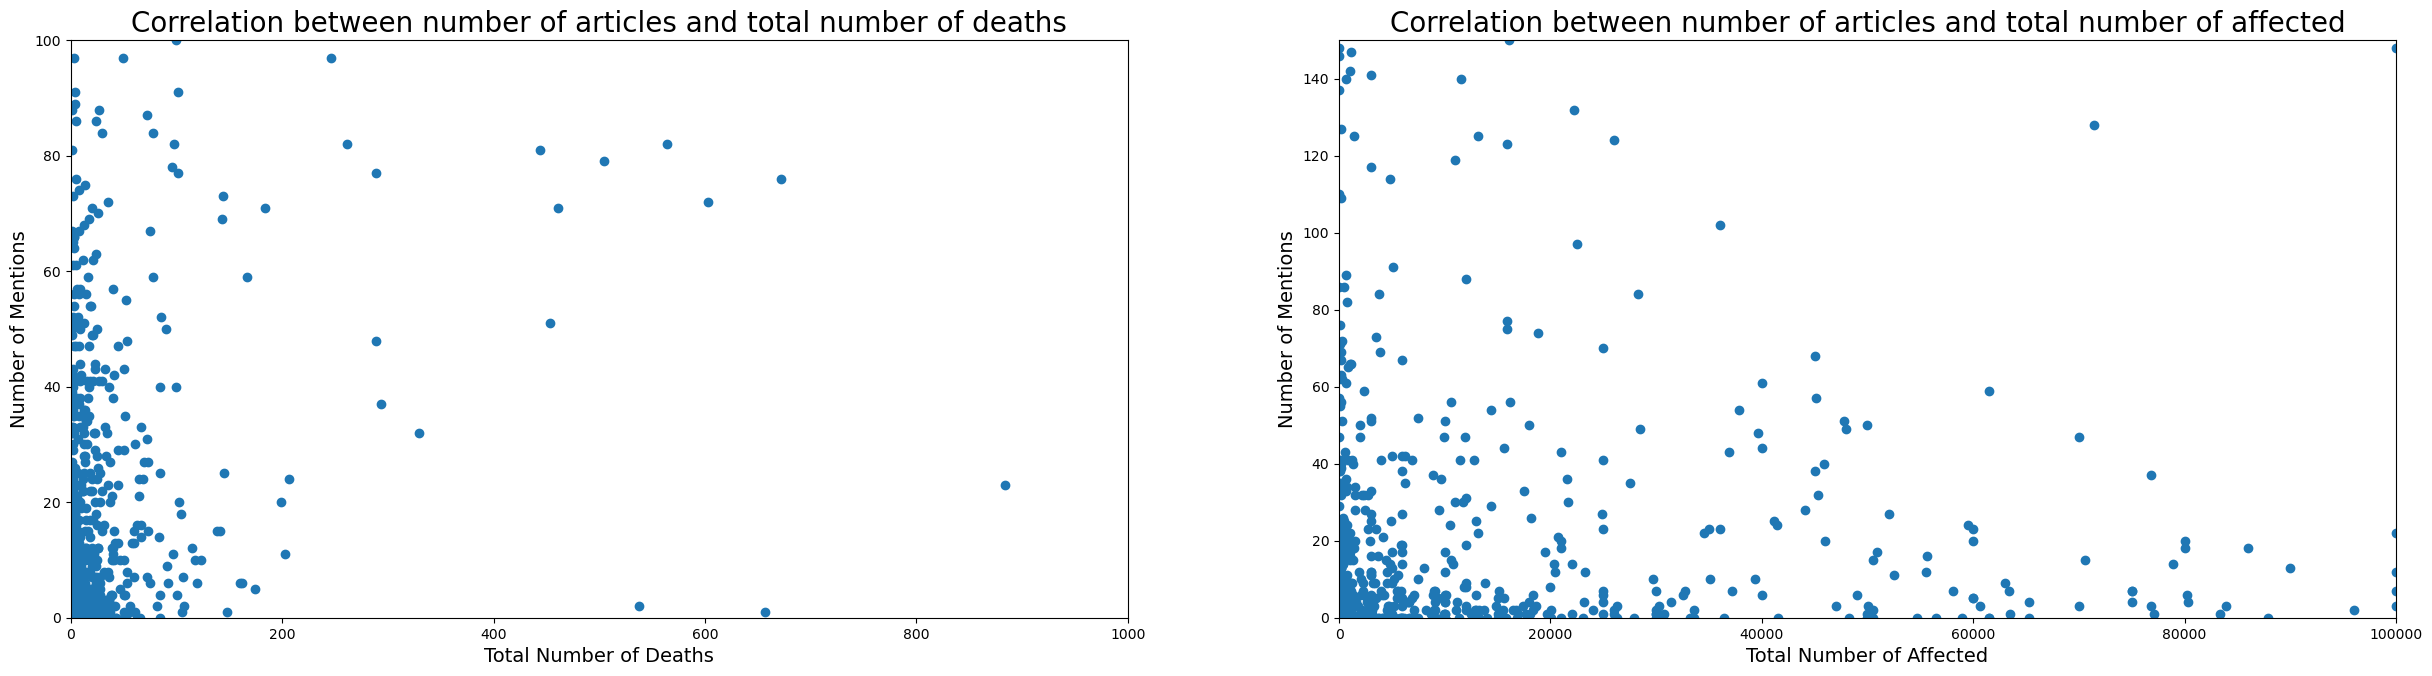

In [20]:
results = results[results['Total Affected'].notna()].copy()
results = results[results['Total Deaths'].notna()].copy()
results["Total"] = results['mentions_1'] + results['mentions_2'] + results['mentions_3']

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(30, 7.5), dpi=100)
gs = fig.add_gridspec(1, 2, hspace=0.2)
axs = gs.subplots()
axs[0].scatter(results['Total Deaths'], results['Total'])
axs[1].scatter(results['Total Affected'], results['Total'])
axs[0].set_xlim(0,1000)
axs[0].set_ylim(0,100)
axs[1].set_xlim(0,100000)
axs[1].set_ylim(0,150)
axs[0].set_title("Correlation between number of articles and total number of deaths", size=20)
axs[1].set_title("Correlation between number of articles and total number of affected", size=20)
axs[0].set_xlabel("Total Number of Deaths", size=14)
axs[0].set_ylabel('Number of Mentions', size=14)
axs[1].set_xlabel("Total Number of Affected", size=14)
axs[1].set_ylabel('Number of Mentions', size=14)
plt.savefig("./figures/correlation_mention_deaths.png", bbox_inches="tight")
plt.show()

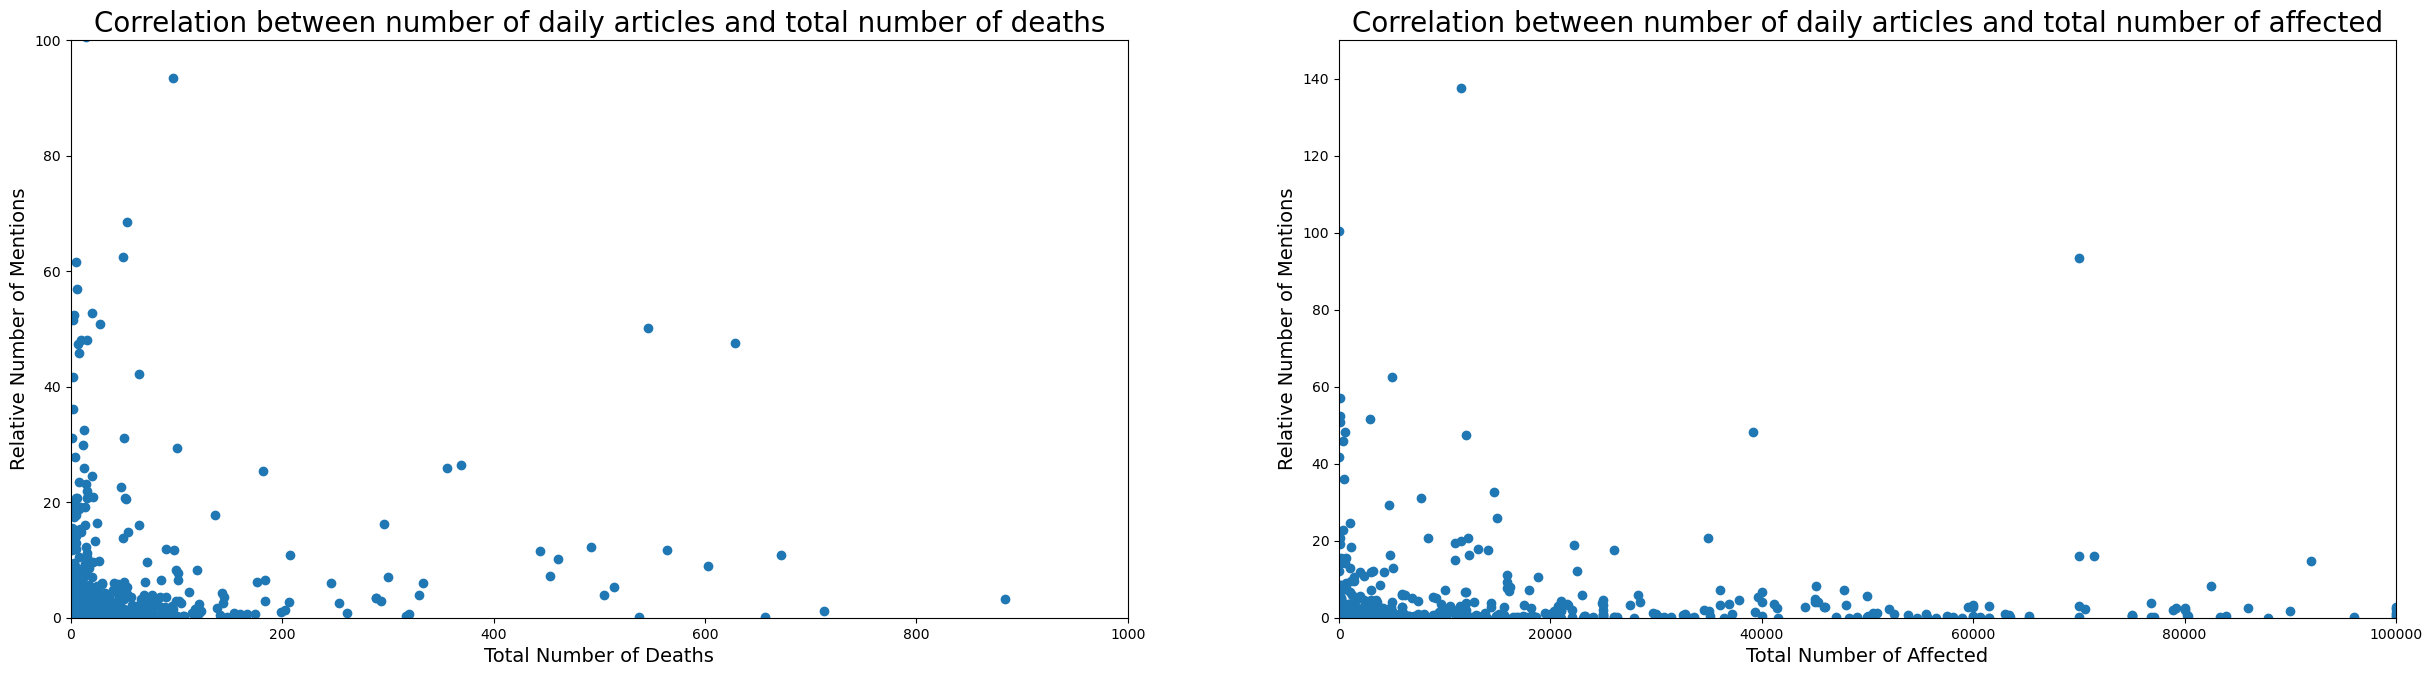

In [21]:
results = results[results['Total Affected'].notna()].copy()
results = results[results['Total Deaths'].notna()].copy()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(30, 7.5), dpi=100)
gs = fig.add_gridspec(1, 2, hspace=0.2)
axs = gs.subplots()
axs[0].scatter(results['Total Deaths'], results['Relative Total'])
axs[1].scatter(results['Total Affected'], results['Relative Total'])
axs[0].set_xlim(0,1000)
axs[0].set_ylim(0,100)
axs[1].set_xlim(0,100000)
axs[1].set_ylim(0,150)
axs[0].set_title("Correlation between number of daily articles and total number of deaths", size=20)
axs[1].set_title("Correlation between number of daily articles and total number of affected", size=20)
axs[0].set_xlabel("Total Number of Deaths", size=14)
axs[0].set_ylabel('Relative Number of Mentions', size=14)
axs[1].set_xlabel("Total Number of Affected", size=14)
axs[1].set_ylabel('Relative Number of Mentions', size=14)
plt.savefig("./figures/correlation_mention_deaths_relative.png", bbox_inches="tight")
plt.show();

In [22]:
results.sort_values(["Total Deaths"], ascending=False).head(10)

,Unnamed: 0,Dis No,Year,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Appeal,Declaration,AID Contribution ('000 US$),Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damages, Adjusted ('000 US$)","Total Damages, Adjusted ('000 US$)",Geo Locations,Start Date,End Date,Location List,mentions_1,mentions_2,mentions_3,Total,Date Difference (Days),Relative Total
703,703,2018-0352-IDN,2018,EQ-2018-000122,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Dongalla, Sigi (dongalla), Parigi Moutong, Pal...",NaN,Tsunami/Tidal wave,Liquefaction,Yes,Yes,NaN,8.0,Richter,-0.256,119.846,NaN,4140.0,NaN,2000000.0,NaN,2000000.0,1864736.0,NaN,1689917.0,"Donggala, Kota Palu, Mamuju Utara, Parigimouto...",2018-09-28,2018-09-28,"['Dongalla', 'Sigi', 'dongalla', 'Parigi Mouto...",0,82,42,124,0.0,17.714286
1098,1098,2018-0363-COD,2018,NaN,Natural,Biological,Epidemic,Viral disease,NaN,Ebola,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,"Beni, Mabalako, Katwa, Kalunguta, Butembo, Mas...",NaN,NaN,NaN,NaN,NaN,NaN,301779.0,Vaccinated,NaN,NaN,NaN,2287.0,3470.0,NaN,NaN,3470.0,NaN,NaN,NaN,NaN,2018-08-01,2019-12-13,"['Beni', 'Mabalako', 'Katwa', 'Kalunguta', 'Bu...",1257,58,0,1315,499.0,2.598814
856,856,2019-0331-IND,2019,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,India,IND,Southern Asia,Asia,"Sitamarhi, Sheohar, East Champaran, Muzaffarpu...",Monsoon rain,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,1900.0,NaN,3000000.0,NaN,3000000.0,NaN,228943.0,11447148.0,"Himachal Pradesh, Karnataka, Kerala, Maharasht...",2019-07-14,2019-09-30,"['Sitamarhi', 'Sheohar', 'East Champaran', 'Mu...",0,88,305,393,78.0,4.623529
972,972,2017-0343-SLE,2017,MS-2017-000109,Natural,Hydrological,Landslide,Mudslide,NaN,NaN,Sierra Leone,SLE,Western Africa,Africa,"Freetown, Regent neighbourhood, Juba/Kaningo, ...",Torrential rains,"Slide (land, mud, snow, rock)",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1102.0,100.0,11816.0,NaN,11916.0,NaN,NaN,35818.0,"Western Area Rur, Western Area Urb (Adm2).",2017-08-14,2017-08-14,"['Freetown', 'Regent neighbourhood', 'Juba/Kan...",0,40,7,47,0.0,6.714286
601,601,2017-0508-IND,2017,TC-2017-000172,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone 'Ockhi',India,IND,Southern Asia,Asia,"Kerala (Thiruvananthapuram, Kozhikode,Ernakula...",NaN,Flood,NaN,NaN,NaN,NaN,130.0,Kph,NaN,NaN,"Amaravathi, Bhavani, Suwarnamukhi and Kalingi ...",884.0,NaN,60000.0,NaN,60000.0,NaN,NaN,NaN,"Chittoor, Ernakulam, Kanniyakumari, Kavaratti,...",2017-12-02,2017-12-02,"['Kerala', 'Thiruvananthapuram', 'Kozhikode,Er...",5,0,18,23,0.0,3.285714
1144,1144,2019-0122-YEM,2019,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,Yemen,YEM,Western Asia,Asia,"Ibb, Amanat (Sana’a city) and Hodeidah governo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccinated,NaN,NaN,NaN,713.0,461542.0,NaN,NaN,461542.0,NaN,NaN,NaN,NaN,2019-01-01,2019-07-05,"['Ibb', 'Amanat', 'Sana’a city and Hodeidah go...",147,61,16,224,185.0,1.166667
1,1,2016-0117-ECU,2016,EQ-2016-000035,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Ecuador,ECU,South America,Americas,"Guayaquil district (Guayas province), Muisne d...",NaN,NaN,"Slide (land, mud, snow, rock)",NaN,Yes,44992.0,8.0,Richter,0.382,-79.920,NaN,672.0,6274.0,383090.0,NaN,389364.0,4077535.0,682841.0,2438717.0,"Los Rios, Santa Elena, Santo Domingo de los Ts...",2016-04-16,2016-04-16,"['Guayaquil district', 'Guayas province', 'Mui...",0,5,71,76,0.0,10.857143
998,998,2017-0379-SDN,2017,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,Acute Watery Diarrhoea,Sudan (the),SDN,Northern Africa,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccinated,NaN,NaN,NaN,657.0,30762.0,NaN,NaN,30762.0,NaN,NaN,NaN,NaN,2017-09-18,2017-09-18,[],1,0,0,1,0.0

In [23]:
results.sort_values(['Total Affected'], ascending=False).head(10)

,Unnamed: 0,Dis No,Year,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Appeal,Declaration,AID Contribution ('000 US$),Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damages, Adjusted ('000 US$)","Total Damages, Adjusted ('000 US$)",Geo Locations,Start Date,End Date,Location List,mentions_1,mentions_2,mentions_3,Total,Date Difference (Days),Relative Total
165,165,2016-0010-USA,2016,NaN,Natural,Meteorological,Storm,Convective storm,Winter storm/Blizzard,Storm Jonas (Snowzilla),United States of America (the),USA,Northern America,Americas,Washington D.C. (District of Columbia district...,NaN,Snow/ice,NaN,NaN,Yes,NaN,NaN,Kph,NaN,NaN,NaN,50.0,12.0,85000000.0,NaN,85000012.0,NaN,292646.0,670647.0,"Delaware, District of Columbia, Georgia, Kentu...",2016-01-23,2016-01-26,"['Washington D.C.', 'District of Columbia dist...",89,223,0,312,3.0,31.200000
9,9,2016-0241-CHN,2016,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,China,CHN,Eastern Asia,Asia,"Jiangsu, Anhui, Jiangxi, Henan, Hubei, Hunan, ...",Heavy rains,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,720844.0,Km2,27.976,114.24,Yangtze river,289.0,NaN,60000000.0,NaN,60000000.0,NaN,526763.0,26825889.0,"Anhui Sheng, Chongqing Shi, Guangxi Zhuangzu Z...",2016-06-28,2016-07-13,"['Jiangsu', 'Anhui', 'Jiangxi', 'Henan', 'Hube...",0,5,72,77,15.0,3.500000
704,704,2018-0295-IND,2018,FL-2018-000134,Natural,Hydrological,Flood,Flash flood,NaN,NaN,India,IND,Southern Asia,Asia,"Thrissur, Chengannur (Kerala state); West Beng...",Monsoonal rains,"Slide (land, mud, snow, rock)",Broken Dam/Burst bank,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,504.0,NaN,23000000.0,220000.0,23220000.0,NaN,NaN,3324452.0,"Assam, Himachal Pradesh, Maharashtra, Nagaland...",2018-08-07,2018-08-20,"['Thrissur', 'Chengannur', 'Kerala state', 'We...",0,11,68,79,13.0,3.950000
880,880,2019-0164-IND,2019,ST-2019-000134,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone 'Fani',India,IND,Southern Asia,Asia,Odisha province,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,50.0,NaN,20000000.0,NaN,20000000.0,NaN,NaN,2071934.0,Orissa (Adm1).,2019-05-03,2019-05-03,['Odisha province'],26,0,17,43,0.0,6.142857
635,635,2017-0342-IND,2017,FL-2017-000084,Natural,Hydrological,Flood,NaN,NaN,NaN,India,IND,Southern Asia,Asia,"Araria, Jogbani (Bihar); Uttar Pradesh, West B...",Monsoonal rain,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,514.0,NaN,17200000.0,NaN,17200000.0,NaN,NaN,1870883.0,"Uttar Pradesh, West Bengal (Adm1). Araria (Adm...",2017-08-11,2017-08-31,"['Araria', 'Jogbani', 'Bihar', 'Uttar Pradesh'...",0,20,124,144,20.0,5.333333
232,232,2017-0245-CHN,2017,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,China,CHN,Eastern Asia,Asia,"Hunan, Anhui, Chongqing, Guangdong, Guangxi, G...",Heavy seasonal rains (Mei-yu),"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,Xiangjiang River,78.0,8.0,12000000.0,NaN,12000008.0,NaN,298482.0,7163559.0,"Anhui Sheng, Chongqing Shi, Guangdong Sheng, G...",2017-06-22,2017-07-07,"['Hunan', 'Anhui', 'Chongqing', 'Guangdong', '...",0,11,48,59,15.0,2.681818
857,857,2019-0125-IRN,2019,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Iran (Islamic Republic of),IRN,Southern Asia,Asia,"Kermanshah, Golestan, Mazandaran, North Khoras...",Heavy rains,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,70.0,1076.0,10000000.0,NaN,10001076.0,NaN,228943.0,2861787.0,"Chaharmahal-o bakhtiyar, Fars, Ghom, Gilan, Go...",2019-03-19,2019-04-10,"['Kermanshah', 'Golestan', 'Mazandaran', 'Nort...",0,178,0,178,22.0,6.137931
250,250,2017-0381-CUB,2017,TC-2017-000132,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Irma',Cuba,CUB,Caribbean,Americas,"Habana del Este, Habana Vieja, Centro Habana, ...",NaN,Flood,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,10.0,NaN,10000000.0,NaN,1000

# Which deadly natural disasters did not get a lot of attention?

In [24]:
results[(results['Total Deaths'] > 400) & (results['Total'] < 60)]

,Unnamed: 0,Dis No,Year,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Appeal,Declaration,AID Contribution ('000 US$),Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Reconstruction Costs, Adjusted ('000 US$)","Insured Damages, Adjusted ('000 US$)","Total Damages, Adjusted ('000 US$)",Geo Locations,Start Date,End Date,Location List,mentions_1,mentions_2,mentions_3,Total,Date Difference (Days),Relative Total
131,131,2016-0321-PRK,2016,FL-2016-000097,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Korea (the Democratic People's Republic of),PRK,Eastern Asia,Asia,"Hamgyong-bukto province (North Hamgyong), Ryan...","Heavy rains, remmants of Typhoon Lionrock",NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,Tuman river and tributaries,538.0,NaN,667715.0,NaN,667715.0,NaN,NaN,74381.0,"Hamgyong-bukto, Yanggang-do (Adm1).",2016-08-29,2016-09-06,"['Hamgyong-bukto province', 'North Hamgyong', ...",0,2,0,2,8.0,0.133333
601,601,2017-0508-IND,2017,TC-2017-000172,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone 'Ockhi',India,IND,Southern Asia,Asia,"Kerala (Thiruvananthapuram, Kozhikode,Ernakula...",NaN,Flood,NaN,NaN,NaN,NaN,130.0,Kph,NaN,NaN,"Amaravathi, Bhavani, Suwarnamukhi and Kalingi ...",884.0,NaN,60000.0,NaN,60000.0,NaN,NaN,NaN,"Chittoor, Ernakulam, Kanniyakumari, Kavaratti,...",2017-12-02,2017-12-02,"['Kerala', 'Thiruvananthapuram', 'Kozhikode,Er...",5,0,18,23,0.0,3.285714
730,730,2018-0458-IDN,2018,NaN,Natural,Geophysical,Volcanic activity,NaN,NaN,Anak Krakatoa,Indonesia,IDN,South-Eastern Asia,Asia,"Pandenglang, South Lampung, Serang districts (...",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453.0,14059.0,33719.0,NaN,47778.0,NaN,NaN,291365.0,"Lampung Selatan, Pandeglang, Serang (Adm2).",2018-12-22,2018-12-22,"['Pandenglang', 'South Lampung', 'Serang distr...",49,0,2,51,0.0,7.285714
972,972,2017-0343-SLE,2017,MS-2017-000109,Natural,Hydrological,Landslide,Mudslide,NaN,NaN,Sierra Leone,SLE,Western Africa,Africa,"Freetown, Regent neighbourhood, Juba/Kaningo, ...",Torrential rains,"Slide (land, mud, snow, rock)",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1102.0,100.0,11816.0,NaN,11916.0,NaN,NaN,35818.0,"Western Area Rur, Western Area Urb (Adm2).",2017-08-14,2017-08-14,"['Freetown', 'Regent neighbourhood', 'Juba/Kan...",0,40,7,47,0.0,6.714286
998,998,2017-0379-SDN,2017,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,Acute Watery Diarrhoea,Sudan (the),SDN,Northern Africa,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccinated,NaN,NaN,NaN,657.0,30762.0,NaN,NaN,30762.0,NaN,NaN,NaN,NaN,2017-09-18,2017-09-18,[],1,0,0,1,0.0,0.142857


In [25]:
sum(results[(results['Total Affected'] > 40000) & (results['mentions_1'] + results['mentions_2'] + results['mentions_3'] < 60)]['Continent'] == 'Asia')

122

In [26]:
sum(results[(results['Total Affected'] > 40000) & (results['mentions_1'] + results['mentions_2'] + results['mentions_3'] < 60)]['Continent'] == 'Africa')

29

In [27]:
sum(results[(results['Total Affected'] > 40000) & (results['mentions_1'] + results['mentions_2'] + results['mentions_3'] < 60)]['Continent'] == 'Europe')

3

In [28]:
sum(results[(results['Total Affected'] > 40000) & (results['mentions_1'] + results['mentions_2'] + results['mentions_3'] < 60)]['Continent'] == 'Americas')

15

In [29]:
sum(results[(results['Total Affected'] > 40000) & (results['mentions_1'] + results['mentions_2'] + results['mentions_3'] < 60)]['Continent'] == 'Oceania')

3

In [30]:
sum(results[(results['Continent'] == 'Americas')]['Continent'] == 'Americas')

186

In [31]:
sum(results[(results['Continent'] == 'Asia')]['Continent'] == 'Asia')

422

In [32]:
sum(results[(results['Continent'] == 'Africa')]['Continent'] == 'Africa')

170